In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
PATH = '../pred/'

In [4]:
baseline = pd.read_csv(PATH + 'lgb_baseline.csv', header=None, names=['Id', 'Pred'])
group = pd.read_csv(PATH + 'lgb_group.csv', header=None, names=['Id', 'Pred'])
pca = pd.read_csv(PATH + 'lgb_pca_feature.csv', header=None, names=['Id', 'Pred'])

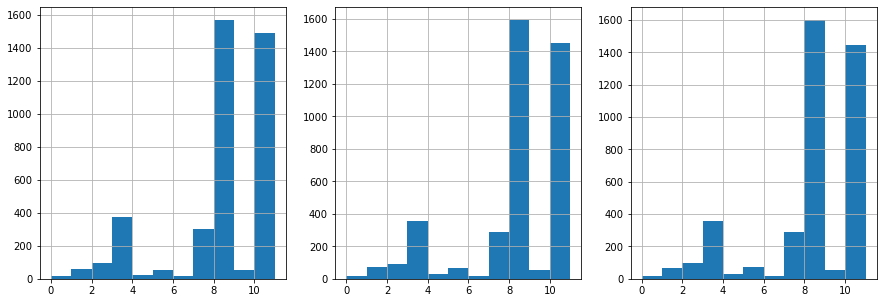

In [7]:
plt.figure(figsize=(5 * 3, 5))
plt.subplot(1, 3, 1)
baseline.Pred.hist(bins=11, range=(0, 11))
plt.subplot(1, 3, 2)
group.Pred.hist(bins=11, range=(0, 11))
plt.subplot(1, 3, 3)
pca.Pred.hist(bins=11, range=(0, 11))

Text(0, 0.5, 'pca')

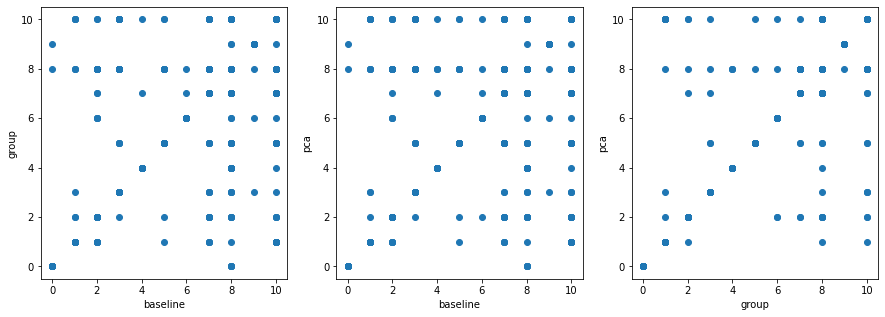

In [9]:
plt.figure(figsize=(5 * 3, 5))
plt.subplot(1, 3, 1)
plt.scatter(baseline.Pred, group.Pred)
plt.xlabel('baseline')
plt.ylabel('group')
plt.subplot(1, 3, 2)
plt.scatter(baseline.Pred, pca.Pred)
plt.xlabel('baseline')
plt.ylabel('pca')
plt.subplot(1, 3, 3)
plt.scatter(group.Pred, pca.Pred)
plt.xlabel('group')
plt.ylabel('pca')

In [19]:
all_df = pd.merge(baseline, group, how='left', on='Id', suffixes=('_baseline', '_group'))
all_df = pd.merge(all_df, pca, how='left', on='Id')
all_df = all_df.rename(columns={'Pred': 'Pred_pca'})
all_df.head()

,Id,Pred_baseline,Pred_group,Pred_pca
0,4046,8,8,8
1,4047,10,10,10
2,4048,8,8,8
3,4049,10,10,10
4,4050,8,8,8


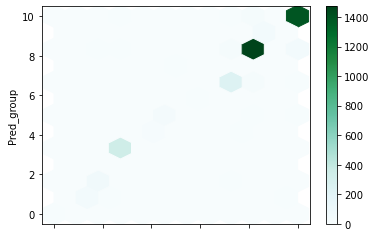

In [22]:
all_df.plot.hexbin('Pred_baseline', 'Pred_group', gridsize=11)

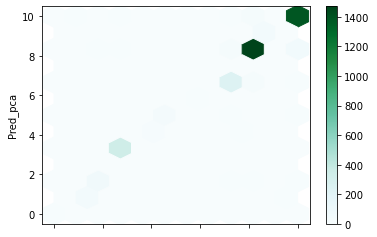

In [23]:
all_df.plot.hexbin('Pred_baseline', 'Pred_pca', gridsize=11)

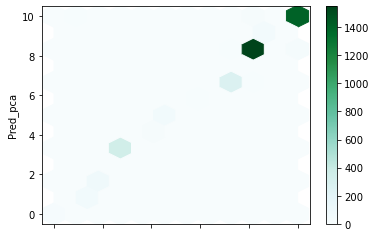

In [24]:
all_df.plot.hexbin('Pred_group', 'Pred_pca', gridsize=11)